In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display
df = pd.read_csv("train.csv")

The first 5 rows of data in the trains.csv file

In [3]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Distribution of Age of people on the Titanic

<Axes: xlabel='Age', ylabel='Count'>

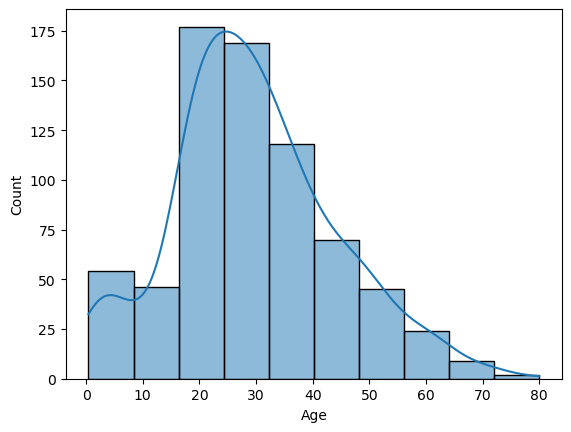

In [4]:
age = df["Age"]
sns.histplot(x=age,bins=10,kde=True)

/var/folders/kd/8_wz1m7542jcll1kwbbh5pm80000gn/T/ipykernel_1604/1427255149.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = temp_df.groupby("Age Range",as_index=True)[["Survived"]].mean()


,Survived
Age Range,
"(0, 10]",0.593750
"(10, 20]",0.382609
"(20, 30]",0.365217
"(30, 40]",0.445161
"(40, 50]",0.383721
"(50, 60]",0.404762
"(60, 70]",0.235294
"(70, 80]",0.200000


<Axes: xlabel='Age Range', ylabel='Survival Rate'>

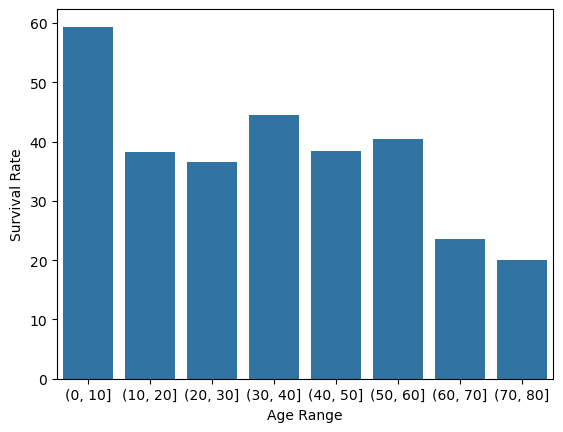

In [11]:
temp_df = df.copy()
bins = range(0,81,10)
temp_df["Age Range"] = pd.cut(df["Age"],bins=bins)
age_survival_rate = temp_df.groupby("Age Range",as_index=True)[["Survived"]].mean()
display(age_survival_rate)
age_survival_rate["Survived"]= age_survival_rate["Survived"]* 100
age_survival_rate.rename({"Survived":"Survival Rate"},axis="columns",inplace=True)
sns.barplot(data=age_survival_rate,y="Survival Rate",x="Age Range")